In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #data visualization
import seaborn as sns
from sklearn.model_selection import train_test_split # Split data to train and test data(after merging in this case)
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix 
import warnings
warnings.filterwarnings('ignore')


# import libraries from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
#from keras.utils.vis_utils import plot_model
from keras.utils import plot_model
#from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform
from tensorflow.keras.regularizers import l2

### FINAL CODE

In [102]:
# Training model to predict Zoom 

#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# df is training dataset
df = pd.read_csv('TrainingData_NewDataset_Final.csv')  # Replace 'your_data_file.csv' with your data file's path
# df_test is testing dataset
df_test = pd.read_csv('TestData_NewDataset_Final.csv')

# Independent variables (features)
X = df[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]

# Target variables
#Y = df[['Zoom', 'Focus', 'Contrast']]
Y = df[['Zoom']]

# Setting up Gradient Boosting Regressor with some default parameters
model = GradientBoostingRegressor(random_state=0)

# Wrap it for multi-output regression
wrapper = MultiOutputRegressor(model)

# Setting up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setting up parameter grid for Grid Search
param_grid = {
    'estimator__n_estimators': [100, 200, 300], # added more estimators
    'estimator__learning_rate': [0.001, 0.01, 0.05], # introduced smaller learning rate
    'estimator__max_depth': [2, 3, 4], # considering shallower trees
    'estimator__min_samples_split': [3, 4, 5], # changed split samples
    'estimator__min_samples_leaf': [2, 3], # increased min leaf samples
    'estimator__subsample': [0.7, 0.8, 0.9], # added more subsample options
    'estimator__max_features': ['sqrt', 'log2', None]
}

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(wrapper, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Extract best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_



Fitting 5 folds for each of 1458 candidates, totalling 7290 fits


In [103]:
# Making predictions of Zoom on the test data
X_test = df_test[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]
Y_test = df_test[['Zoom']]
Y_pred = best_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print(f"Mean Squared Error for Zoom: {mse[0]}")

Mean Squared Error for Zoom: 36169927.34030963


In [104]:
# Extracting the 'Zoom' column from Y_test
zoom_values = Y_test['Zoom'].values

# Extracting the first column from predictions
predictions_values = Y_pred[:,0]

# Creating the new DataFrame
df_Zoom = pd.DataFrame({
    'Zoom': zoom_values,
    'Predictions': predictions_values
})

df_Zoom = df_Zoom.sort_values(by='Zoom')
df_Zoom

,Zoom,Predictions
0,25000,27232.030431
19,25000,30771.307827
18,25000,27329.808815
17,25000,34945.117017
16,25000,32650.689275
15,25000,46542.967304
13,25000,23904.329574
12,25000,25115.708199
11,25000,22145.586338
10,25000,23271.952771


In [105]:
# Training model to predict Focus
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# df is training dataset
df = pd.read_csv('TrainingData_NewDataset_Final.csv')  # Replace 'your_data_file.csv' with your data file's path
# df_test is training dataset
df_test = pd.read_csv('TestData_NewDataset_Final.csv')

# Independent variables (features)
X = df[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]

# Target variables
Y = df[['Focus']]

# Setting up Gradient Boosting Regressor with some default parameters
model = GradientBoostingRegressor(random_state=0)

# Wrap it for multi-output regression
wrapper = MultiOutputRegressor(model)

# Setting up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setting up parameter grid for Grid Search
param_grid = {
    'estimator__n_estimators': [50, 100, 150,200],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5],
    'estimator__min_samples_split': [2, 4],
    'estimator__min_samples_leaf': [1, 2],
    'estimator__subsample': [0.8, 1.0],
    'estimator__max_features': ['sqrt', 'log2', None]
}

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(wrapper, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Extract best parameters and model
best_params_F = grid_search.best_params_
best_model_F = grid_search.best_estimator_



Fitting 5 folds for each of 864 candidates, totalling 4320 fits


In [106]:
# Making predictions of Focus on the test data
X_test = df_test[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]
Y_test = df_test[['Focus']]
Y_pred = best_model_F.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print(f"Mean Squared Error for Contrast: {mse[0]}")

Mean Squared Error for Focus: 0.09747216718702961


In [109]:
# Extracting the 'Focus' column from Y_test
focus_values = Y_test['Focus'].values

# Extracting the first column from predictions
predictions_values = Y_pred[:,0]

# Creating the new DataFrame
df_Focus = pd.DataFrame({
    'Focus': focus_values,
    'Predictions': predictions_values
})

df_Focus = df_Focus.sort_values(by='Focus')
print(df_Focus)

    Focus  Predictions
47    5.8     6.197937
19    5.8     6.627005
39    5.8     6.199754
36    6.6     6.591855
46    6.6     6.763670
38    6.6     6.624141
18    6.6     6.786846
15    6.6     7.224829
44    6.6     6.652733
45    6.6     6.619410
43    6.7     6.694522
17    6.7     7.152530
16    6.7     6.757494
14    6.7     6.836179
35    6.7     6.422795
37    6.7     6.612214
12    6.8     6.963543
33    6.8     6.807477
41    6.8     6.788185
34    6.9     7.337076
42    6.9     7.433982
13    6.9     6.942667
3     7.4     7.590286
25    7.4     7.201433
31    7.5     7.257604
29    7.5     7.608085
28    7.5     7.402101
24    7.5     7.425403
9     7.5     7.396030
6     7.5     7.311669
7     7.5     7.559453
30    7.6     7.326001
5     7.6     7.463957
8     7.6     7.541302
27    7.6     7.595009
10    7.6     7.103537
26    7.9     7.468900
4     7.9     7.731449
21    7.9     7.715973
1     7.9     7.478346
0     8.0     7.873253
22    8.0     7.420763
20    8.0  

In [115]:
# Training model to predict Contrast
#Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

# df is training dataframe
df = pd.read_csv('TrainingData_NewDataset_Final.csv')  # Replace 'your_data_file.csv' with your data file's path
# df_test is testing dataframe
df_test = pd.read_csv('TestData_NewDataset_Final.csv')

# Independent variables (features)
X = df[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]

# Target variables
Y = df[['Contrast']]

# Setting up Gradient Boosting Regressor with some default parameters
model = GradientBoostingRegressor(random_state=0)

# Wrap it for multi-output regression
wrapper = MultiOutputRegressor(model)

# Setting up cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Setting up parameter grid for Grid Search
param_grid = {
    #'estimator__n_estimators': [50, 100, 150],
    'estimator__n_estimators': [50, 100, 150, 200, 250],
    #'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__learning_rate': [0.001, 0.01, 0.05, 0.1, 0.5],
    #'estimator__max_depth': [3, 4, 5],
    'estimator__max_depth': [3, 4, 5, 6, 7, 8],
    #'estimator__min_samples_split': [2, 4],
    'estimator__min_samples_split': [2, 4, 6, 8],
    #'estimator__min_samples_leaf': [1, 2],
    'estimator__min_samples_leaf': [1, 2, 4, 6],
    #'estimator__subsample': [0.8, 1.0],
    'estimator__subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'estimator__max_features': ['sqrt', 'log2', None]
}

# Setting up Grid Search with cross-validation
grid_search = GridSearchCV(wrapper, param_grid, cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the Grid Search to the data
grid_search.fit(X, Y)

# Extract best parameters and model
best_params_C = grid_search.best_params_
best_model_C = grid_search.best_estimator_



Fitting 5 folds for each of 36000 candidates, totalling 180000 fits


In [116]:
# Making predictions of Contrast on the test data
X_test = df_test[['Orientation Loss', 'Edge Coverage', 'Average Thickness', 'Average Separation', 'Distance Entropy']]
Y_test = df_test[['Contrast']]
Y_pred = best_model_C.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print(f"Mean Squared Error for Contrast: {mse[0]}")

Mean Squared Error for Contrast: 8.09885464289165


In [117]:
# Extracting the 'Contrast' column from Y_test
contrast_values = Y_test['Contrast'].values

# Extracting the first column from predictions
predictions_values = Y_pred[:,0]

# Creating the new DataFrame
df_Contrast = pd.DataFrame({
    'Contrast': contrast_values,
    'Predictions': predictions_values
})

df_Contrast = df_Contrast.sort_values(by='Contrast')
print(df_Contrast)

    Contrast  Predictions
47   58.5840    62.309652
39   58.5840    62.426850
19   58.5840    64.452273
23   63.1759    68.013457
2    63.1759    64.978452
31   65.8108    70.220609
9    65.8108    68.283033
10   65.8108    71.370536
30   66.4289    66.802690
8    66.4289    67.084816
4    66.5874    67.365485
1    66.5874    66.959396
29   66.5874    66.709336
28   66.5874    65.668602
26   66.5874    66.278884
22   66.5874    67.411524
21   66.5874    66.176153
20   66.5874    66.907201
0    66.5874    66.580059
7    66.5874    66.547055
6    66.5874    67.645405
5    66.7300    66.887758
27   66.7300    67.153198
25   67.1546    66.310063
24   67.1546    66.987353
3    67.1546    66.912195
16   69.3972    69.181684
46   69.3972    67.861573
38   69.3972    69.642094
18   69.3972    70.143369
40   70.1598    70.082442
11   70.1598    69.257186
45   70.4116    67.801728
37   70.4116    70.910013
17   70.4116    66.713464
36   71.1882    70.847725
44   71.1882    64.102052
15   71.1882

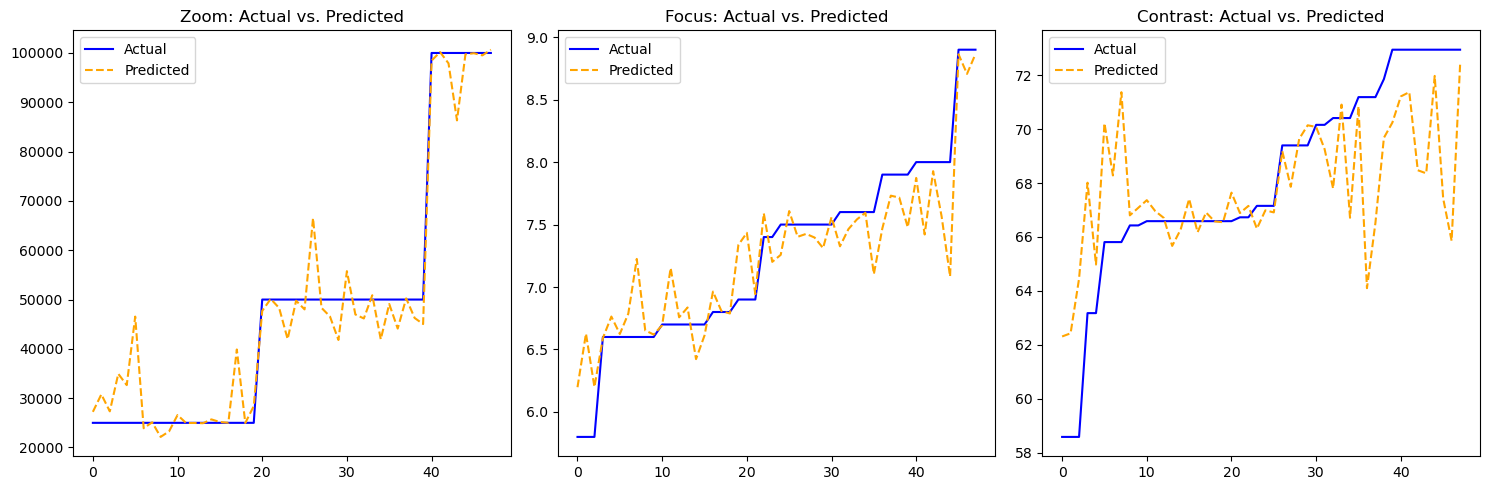

In [118]:
#Visualization of results
import matplotlib.pyplot as plt

#x_values = list(range(len(actual_zoom)))  # Assuming all lists are of the same length
#x_values1 = list(range(len(actual_focus))) 
#x_values2 = list(range(len(actual_contrast))) 

# Sample data
#actual_zoom = [1, 2, 3, 4, 5]
#predicted_zoom = [1.1, 1.9, 3.2, 4.1, 4.9]

#actual_zoom = Y_test['Zoom']
actual_zoom = df_Zoom['Zoom']
#actual_zoom = Y_test[:,0]
x_values = list(range(len(actual_zoom)))  # Assuming all lists are of the same length
#predicted_zoom = predictions[:,0]
predicted_zoom = df_Zoom['Predictions']


#actual_focus = Y_test['Focus']
actual_focus = df_Focus['Focus']
#actual_focus = Y_test[:,1]
x_values1 = list(range(len(actual_focus))) 
#predicted_focus = predictions[:,1]
predicted_focus = df_Focus['Predictions']

#actual_contrast = Y_test['Contrast']
actual_contrast = df_Contrast['Contrast']
#actual_contrast = Y_test[:,2]
x_values2 = list(range(len(actual_contrast))) 
#predicted_contrast = predictions[:,2]
predicted_contrast = df_Contrast['Predictions']

# Plotting
plt.figure(figsize=(15, 5))

# Zoom
plt.subplot(1, 3, 1)
#plt.scatter(actual_zoom, predicted_zoom, color='blue', label='Predicted')
#plt.plot([min(actual_zoom), max(actual_zoom)], [min(actual_zoom), max(actual_zoom)], color='red', label='Ideal')
plt.plot(x_values, actual_zoom, color='blue', label='Actual')
plt.plot(x_values, predicted_zoom, color='orange', linestyle='--', label='Predicted')
plt.title("Zoom: Actual vs. Predicted")
#plt.xlabel("Actual Zoom")
#plt.ylabel("Predicted Zoom")
plt.legend()

# Focus
plt.subplot(1, 3, 2)
#plt.scatter(actual_focus, predicted_focus, color='blue', label='Predicted')
#plt.plot([min(actual_focus), max(actual_focus)], [min(actual_focus), max(actual_focus)], color='red', label='Ideal')
plt.plot(x_values1, actual_focus, color='blue', label='Actual')
plt.plot(x_values1, predicted_focus, color='orange', linestyle='--', label='Predicted')
plt.title("Focus: Actual vs. Predicted")
#plt.xlabel("Actual Focus")
#plt.ylabel("Predicted Focus")
plt.legend()

# Contrast
plt.subplot(1, 3, 3)
#plt.scatter(actual_contrast, predicted_contrast, color='blue', label='Predicted')
#plt.plot([min(actual_contrast), max(actual_contrast)], [min(actual_contrast), max(actual_contrast)], color='red', label='Ideal')
plt.plot(x_values2, actual_contrast, color='blue', label='Actual')
plt.plot(x_values2, predicted_contrast, color='orange', linestyle='--', label='Predicted')
plt.title("Contrast: Actual vs. Predicted")
#plt.xlabel("Actual Contrast")
#plt.ylabel("Predicted Contrast")
plt.legend()

plt.tight_layout()
plt.show()
